In [2]:
%load_ext autoreload
%autoreload 2

from IPython.display import display


import numpy as np
import scipy as sp
import pandas as pd
import numpy.random as rand
import numpy.linalg as la
import scipy.optimize as opt

import matplotlib.pyplot as plt
import seaborn as sns


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
def one_way_push(x, args):
    (WT, ST, vWS, vWSp, vSu) = args
    
    (W, Su, Sp, WSu, WSp, SuT, SpT) = x
        
    res = np.zeros_like(x)
    
    
    pWSp = vWS*W / (1 + vWS*W)
    
    res[0] = SpT/ST - (1+vWSp*pWSp)/ (1+vWSp*pWSp + vSu)
    res[1] = W/WT - 1/(1+vWS*(Su+Sp))
    res[2] = Su/SuT - 1/(1+vWS*W)
    res[3] = Sp/SpT - 1/(1+vWS*W)
    res[4] = ST - SuT - SpT
    res[5] = SuT - Su - WSu
    res[6] = SpT - Sp - WSp
            
    return res




In [29]:
result = opt.root(one_way_push, [4.0, 1.0, 1.0, 3.0, 3.0, 4.0, 4.0], args=((10.0, 10.0, 1.0, 1.0, 1.0),))

print(result)

(W, Su, Sp, WSu, WSp, SuT, SpT) = result.x

print(W, Su, Sp, WSu, WSp, SuT, SpT)

print(10, SuT+SpT)

    fjac: array([[-4.45665199e-02,  8.68797598e-01,  3.48071995e-01,
         3.49357189e-01, -5.77535313e-11, -5.95331004e-18,
        -5.58908145e-12],
       [ 8.87131805e-03, -4.80118301e-02,  1.86092725e-01,
        -6.48784119e-02,  3.12959252e-10, -9.79171310e-01,
         3.36087406e-11],
       [ 8.01120384e-03, -3.12653588e-02, -5.78436213e-02,
         1.36404935e-01,  4.85329380e-10, -1.84256172e-02,
        -9.88264440e-01],
       [ 4.61623159e-02, -2.26493361e-01,  8.91733397e-01,
        -3.19309991e-01,  2.44532904e-09,  2.02155948e-01,
        -9.24956723e-02],
       [ 1.37527291e-01, -4.22695872e-01,  2.06301712e-01,
         8.63180813e-01,  1.47695365e-08,  3.98694076e-03,
         1.21478539e-01],
       [ 1.72256948e-03,  1.90414518e-04, -9.73569288e-05,
        -1.56789633e-04, -9.99998481e-01, -1.84457445e-06,
        -7.96894338e-06],
       [ 9.88343697e-01,  1.09256563e-01, -5.58627125e-02,
        -8.99668171e-02,  1.74288025e-03, -1.05848321e-03,
        

In [45]:
WT = 10
ST = 10
vWS = 1.0
vWSp = 1.0

W0 = 4.0
Su0 = 1.0
Sp0 = 1.0
WSu0 = 3.0
WSp0 = 3.0
SuT0 = 4.0
SpT0 = 4.0

N = 10

x0 = (W0, Su0, Sp0, WSu0, WSp0, SuT0, SpT0)

x = np.zeros([N, len(x0)])

vSu_list = np.logspace(-3, 3, N)
for i, vSu in enumerate(vSu_list):
    
    args = ((WT, ST, vWS, vWSp, vSu),)

    result = opt.root(one_way_push, x0, args=args)
    
    x[i] = result.x
    


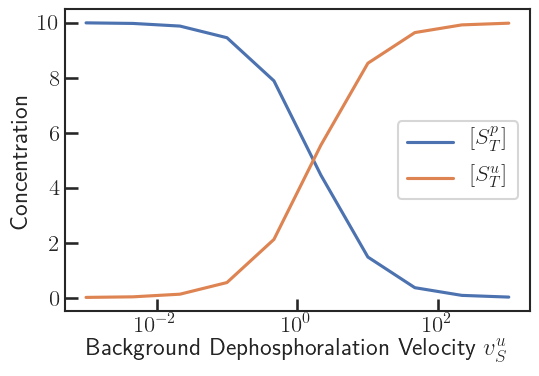

In [46]:
sns.set(context='talk', font_scale=1.0, color_codes=True, palette='deep', style='ticks', 
        rc={'mathtext.fontset': 'cm', 'xtick.direction': 'in','ytick.direction': 'in',
            'axes.linewidth': 1.5, 'figure.dpi':100, 'text.usetex':True})


fig, ax = plt.subplots(1,1, figsize=(6, 4))

ax.plot(vSu_list, x[:, 2]+x[:, 4], label="$[S^p_T]$")
ax.plot(vSu_list, x[:, 1]+x[:, 3], label="$[S^u_T]$")


ax.set_xscale('log')

ax.set_ylabel("Concentration")
ax.set_xlabel("Background Dephosphoralation Velocity $v_S^u$")


ax.legend()

plt.show()